In [1]:

import torch

import matplotlib.pyplot as plt

import seaborn as sns
from models import cVAE_hybrid,MLP_BIC,MLP_color,cVAE,TandemNet_inverse,TandemNet,cGAN
from utils import evaluate_forward,evaluate_cVAE_Hybrid,evaluate_gan,evaluate_tandem,evaluate_vae
from plotting_utils import R2_plot_forward_color,abs_err_plt_forward_color,R2_plot_forward_BIC,abs_err_plt_forward_BIC,R2_plot,abs_err_plt
from datasets import get_dataloaders,get_color_dataloaders,get_BIC_dataloaders


DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
train_loader, val_loader, test_loader = get_dataloaders('forward_model')



# Check Color Model

(3444, 2)
(3444, 2)
(3444, 2)


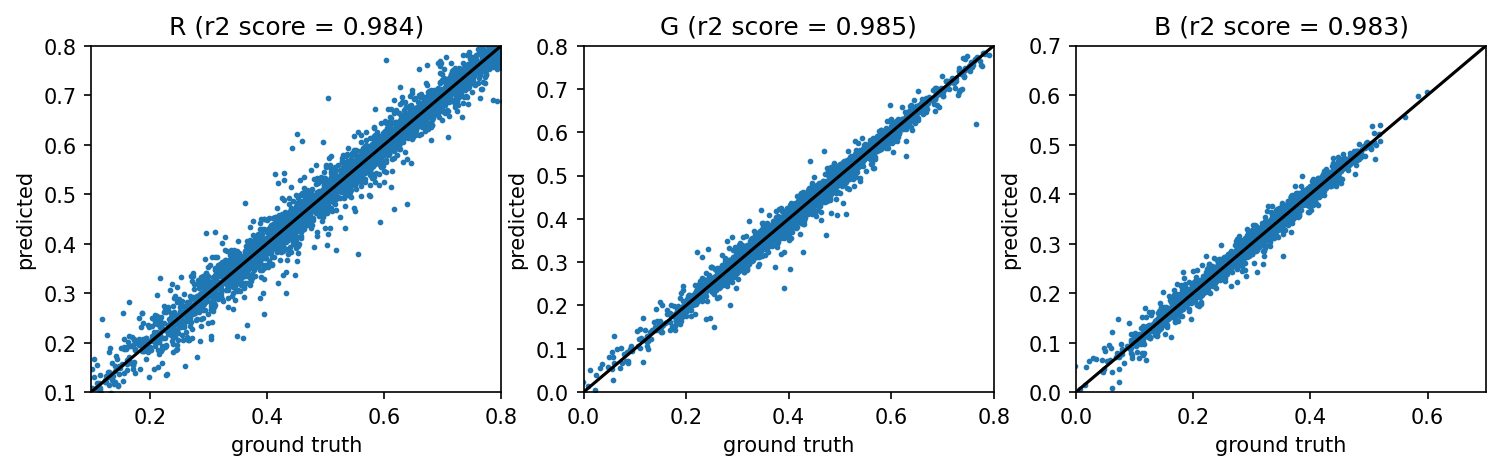

[ 0.02494424  0.01094066  0.00889945]


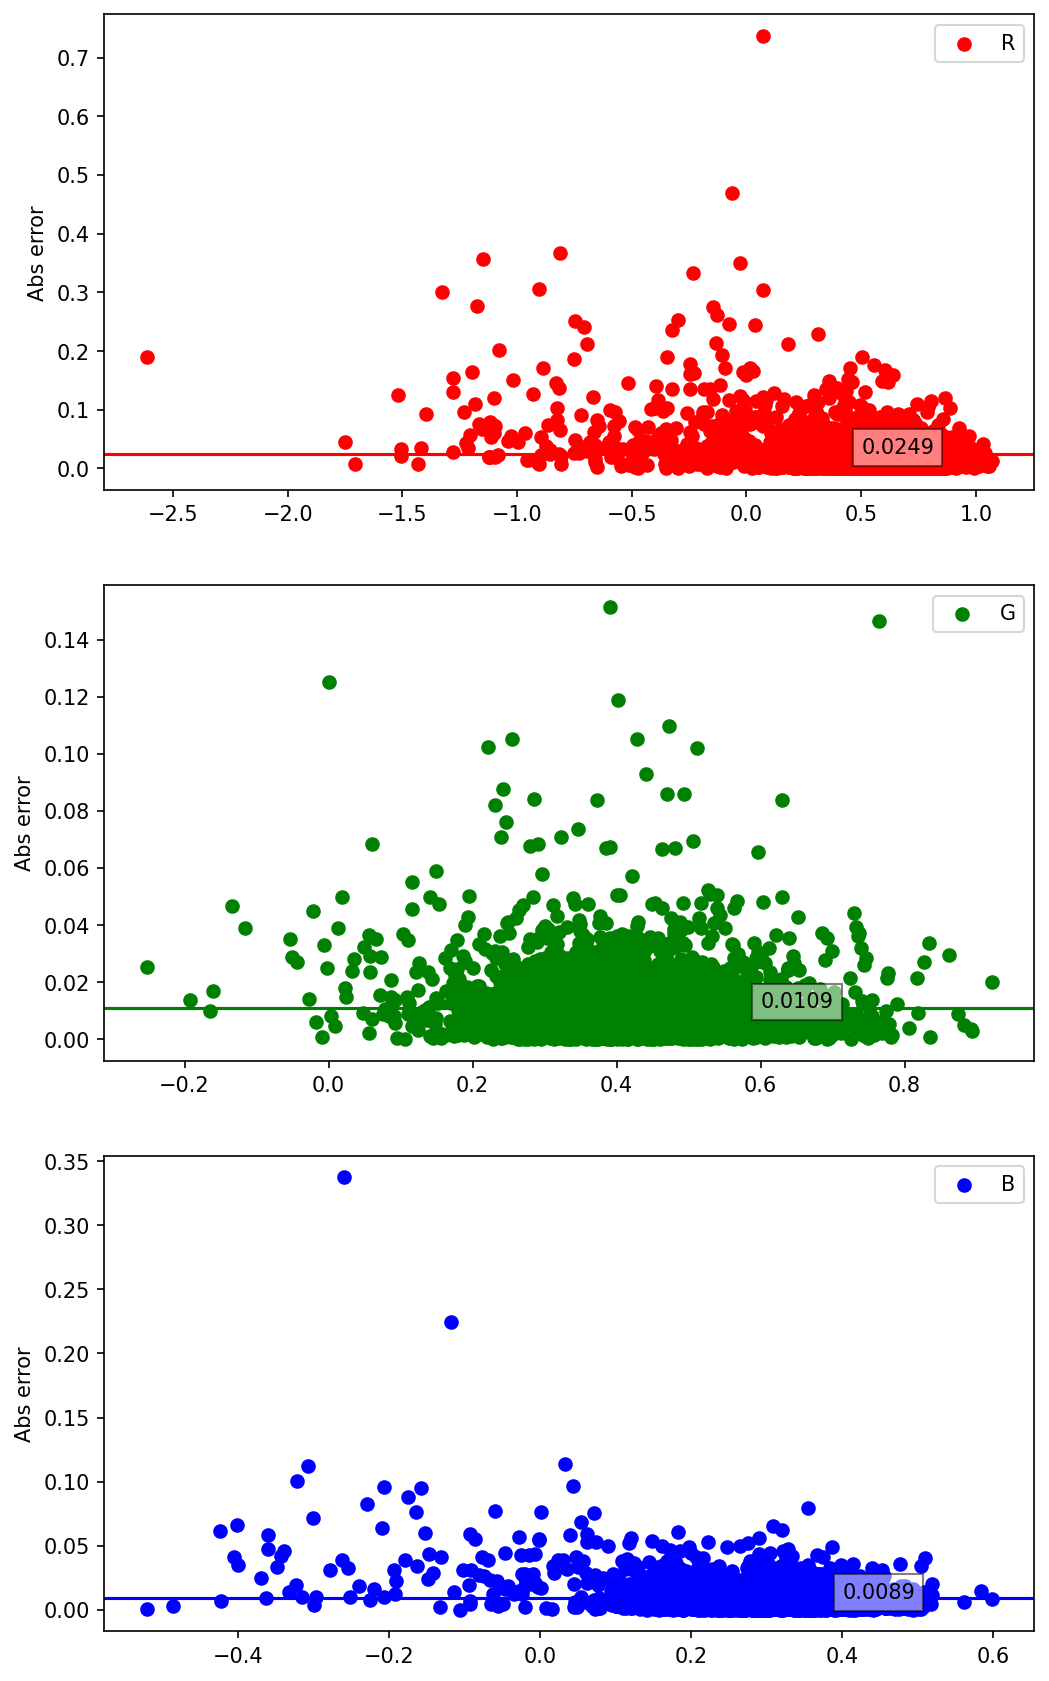

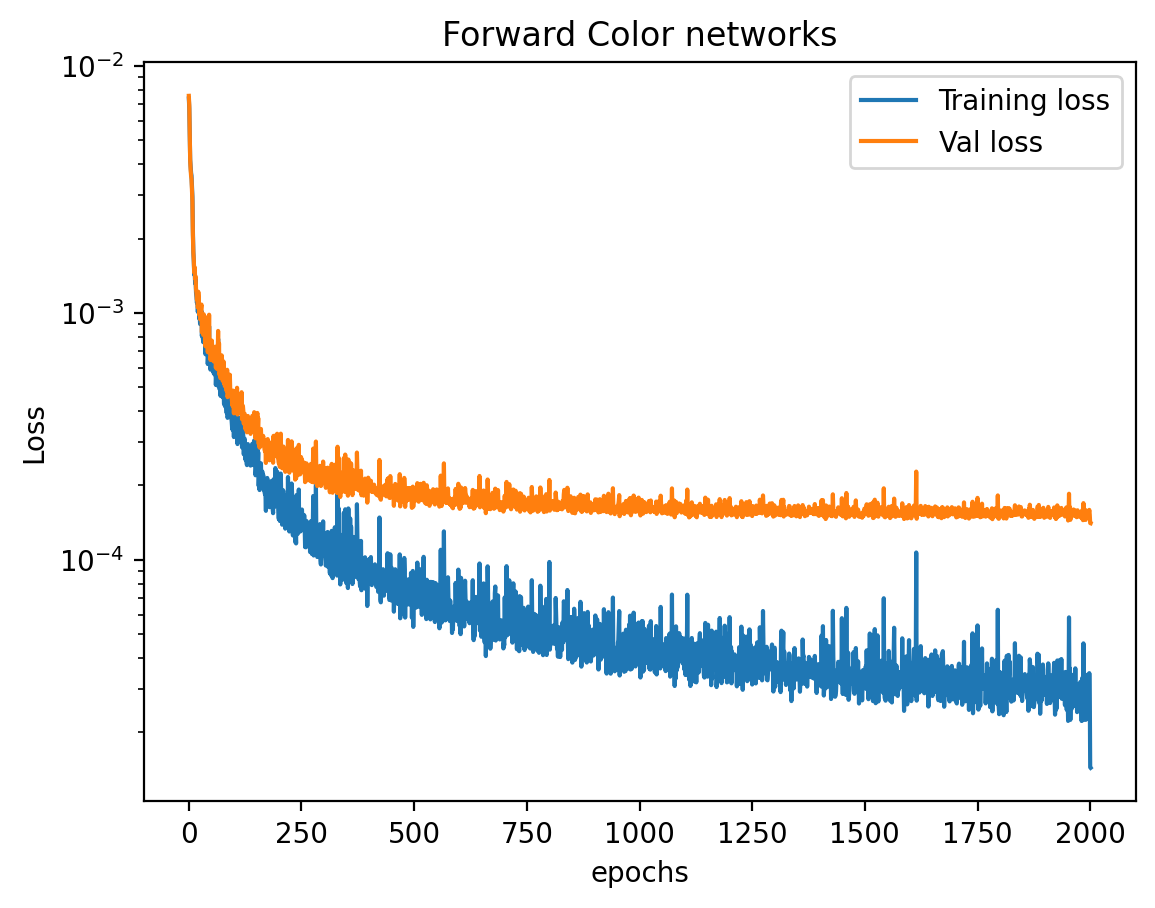

In [2]:
# evaluate the performance of FNNs

train_loader, val_loader, test_loader = get_color_dataloaders('forward_model')
forward_model_train = MLP_color(6, 3).to(DEVICE)
# forward_path_train = './models/trained/forward_color128_epoch_10000_2000_lr_0.001_STEP_True_lr_de_0.2_trained_91601_.pth'
forward_path_train = './model/forward_04.pth'
forward_model_train.load_state_dict(torch.load(forward_path_train)['model_state_dict'])
# test_loader.dataset.y_scaler.data_range_
color_pred, color_raw = evaluate_forward(forward_model_train, test_loader.dataset, show=0)
# cie_pred.shape
R2_plot_forward_color(color_raw, color_pred)
abs_err_plt_forward_color(color_raw, color_pred)


# plot the training and val loss VS epoches.

epochs = torch.load(forward_path_train)['epoch']

loss = torch.load(forward_path_train)['loss_all']
plt.figure(dpi=200)
plt.plot(range(epochs),loss[0,:epochs],label='Training loss')
plt.plot(range(epochs),loss[1,:epochs],label='Val loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Forward Color networks')
plt.legend()



# check BIC model

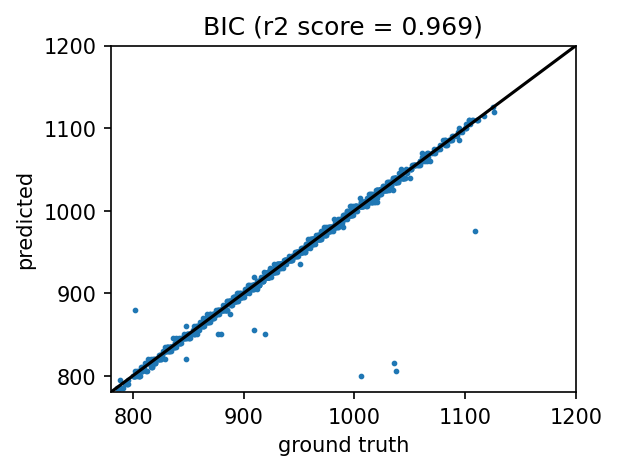

[ 3.3391734]


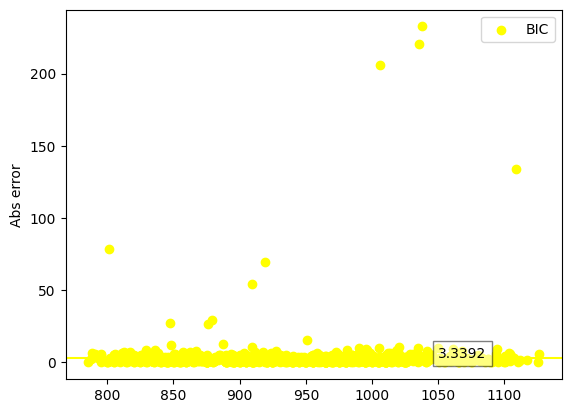

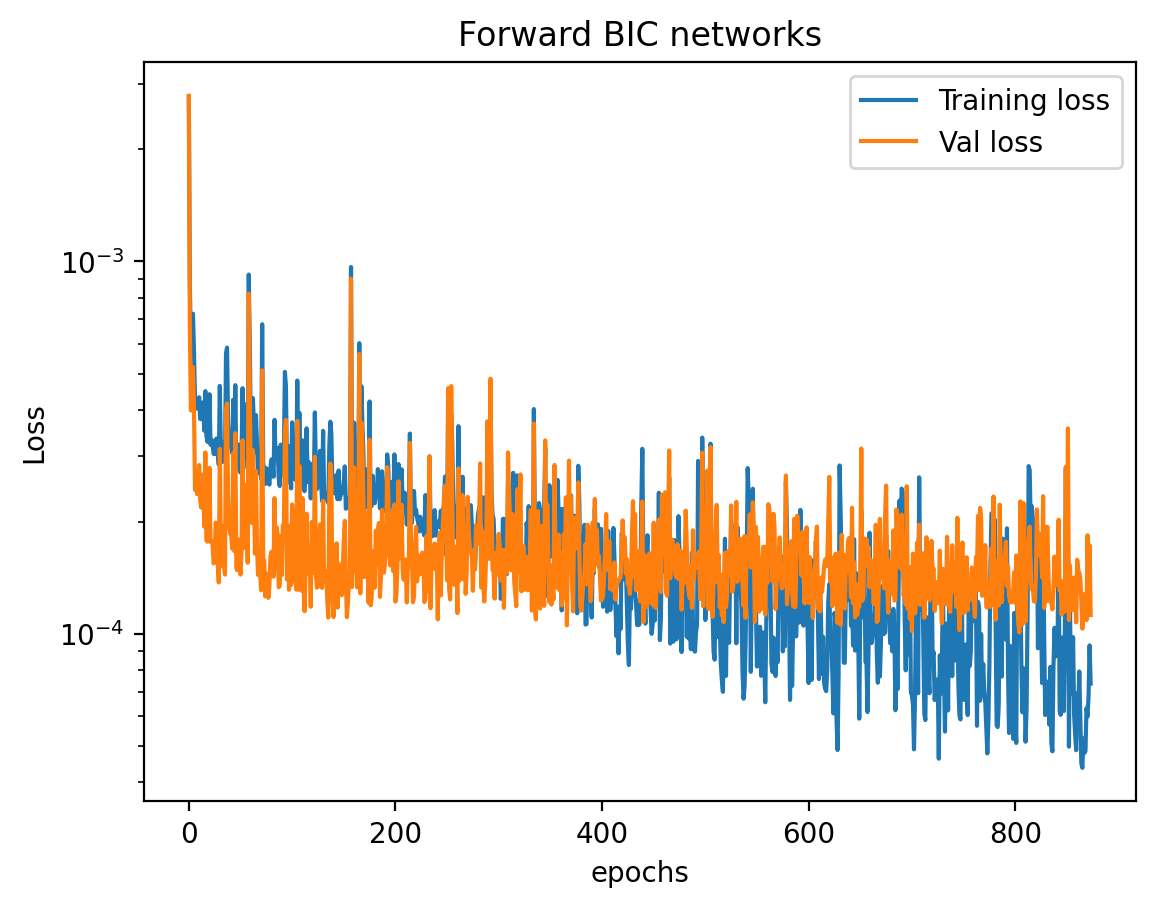

In [3]:
# evaluate the performance of FNNs

train_loader, val_loader, test_loader = get_BIC_dataloaders('forward_model')
forward_model_train = MLP_BIC(6, 1).to(DEVICE)
# forward_path_train = './models/trained/forward_BIC128_epoch_10000_2000_lr_0.001_STEP_True_lr_de_0.2_trained_91601_.pth'
forward_path_train = './model/forwardBIC_02.pth'
forward_model_train.load_state_dict(torch.load(forward_path_train)['model_state_dict'])
# test_loader.dataset.y_scaler.data_range_
BIC_pred, BIC_raw = evaluate_forward(forward_model_train, test_loader.dataset, show=0)
# cie_pred.shape
R2_plot_forward_BIC(BIC_raw, BIC_pred)
abs_err_plt_forward_BIC(BIC_raw, BIC_pred)


# plot the training and val loss VS epoches.

epochs = torch.load(forward_path_train)['epoch']

loss = torch.load(forward_path_train)['loss_all']
plt.figure(dpi=200)
plt.plot(range(epochs),loss[0,:epochs],label='Training loss')
plt.plot(range(epochs),loss[1,:epochs],label='Val loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Forward BIC networks')
plt.legend()



# Check cVAE Hybrid

cuda:0 cuda:0 cuda:0 cuda:0 <class 'torch.Tensor'>


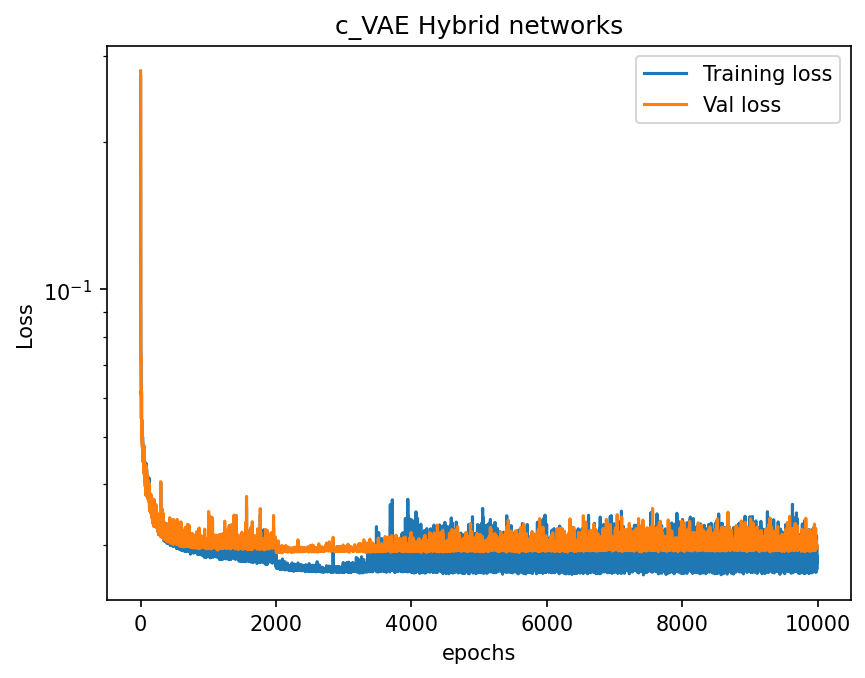

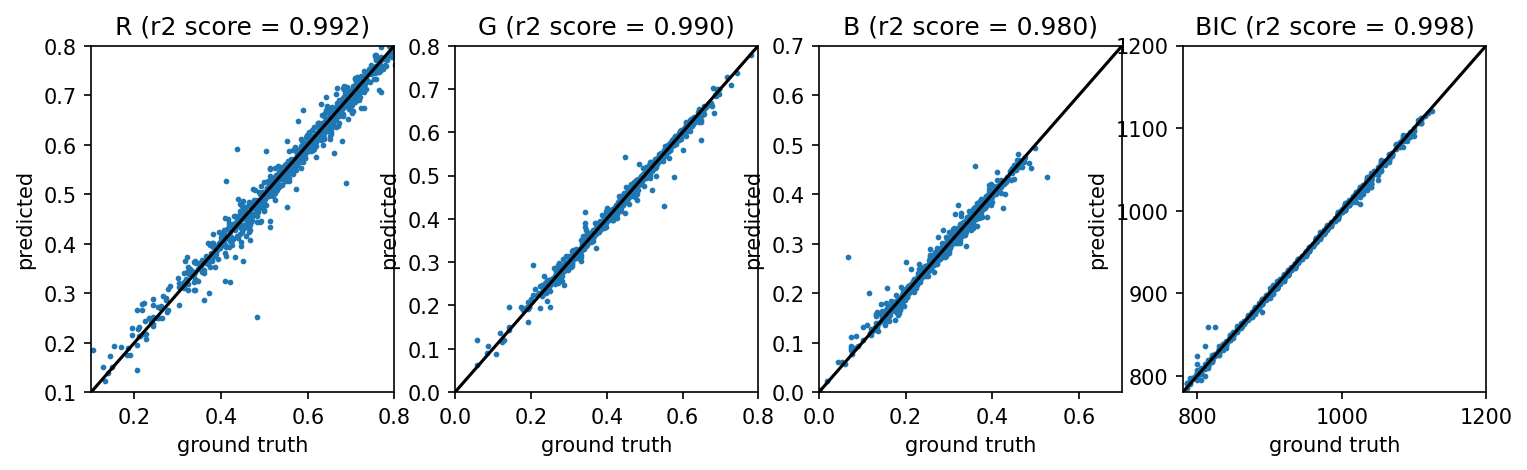

[ 0.01762438  0.00675751  0.00687034  1.98214573]


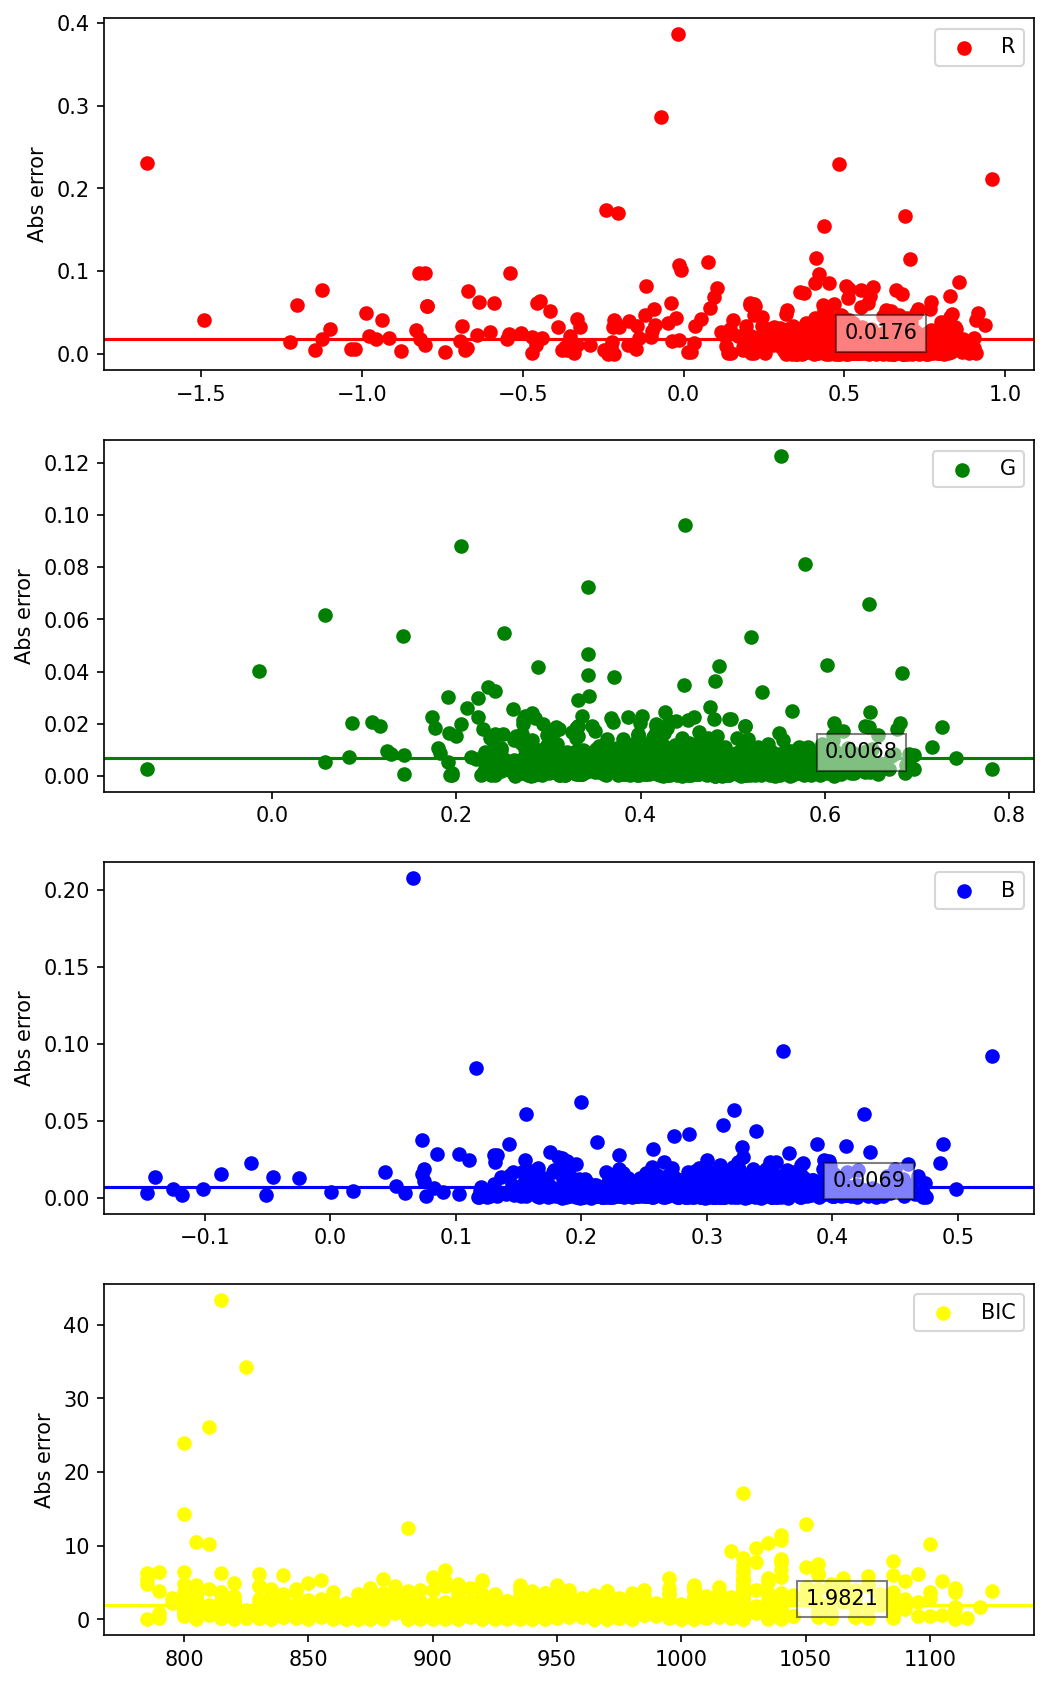

In [48]:

train_loader, val_loader, test_loader = get_dataloaders('forward_model')




color_model = MLP_color(6, 3).to(DEVICE)
color_model.load_state_dict(torch.load(
    './model/forward_03.pth')[
                                  'model_state_dict'])
BIC_model = MLP_BIC(6, 1).to(DEVICE)
BIC_model.load_state_dict(torch.load(
    './model/forwardBIC_02.pth')[
                                  'model_state_dict'])

vae_model = cVAE(6, 4).to(DEVICE)
model = cVAE_hybrid(color_model,BIC_model, vae_model)

vae_path = './model/VAE_04_temp.pth'
#vae_path = './models/summary/cvae_3_forward_True_latent_3_lr_0.001_STEP_True_epochs_10000_weight_forward_10.0_batch_size_128_trained_2_.pth'
model.load_state_dict(torch.load(vae_path)['model_state_dict'])
epochs = torch.load(vae_path)['epoch']
gan_loss_all = torch.load(vae_path)['loss_all']
plt.figure(dpi=150)
plt.plot(range(epochs),gan_loss_all[0,:epochs],label='Training loss')
plt.plot(range(epochs),gan_loss_all[1,:epochs],label='Val loss')

plt.xlabel('epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('c_VAE Hybrid networks')
plt.legend()

# evaluate on the training FNNs
color_BIC_raw, param_raw, color_BIC_pred, param_pred = evaluate_cVAE_Hybrid(model.vae_model, color_model,BIC_model, test_loader.dataset, show=0)

R2_plot(color_BIC_raw, color_BIC_pred)
abs_err_plt(color_BIC_raw, color_BIC_pred)

_cVAE_hybrid_color_raw = color_BIC_raw[:]
_cVAE_hybrid_color_pred = color_BIC_pred[:]


# Check Tandem

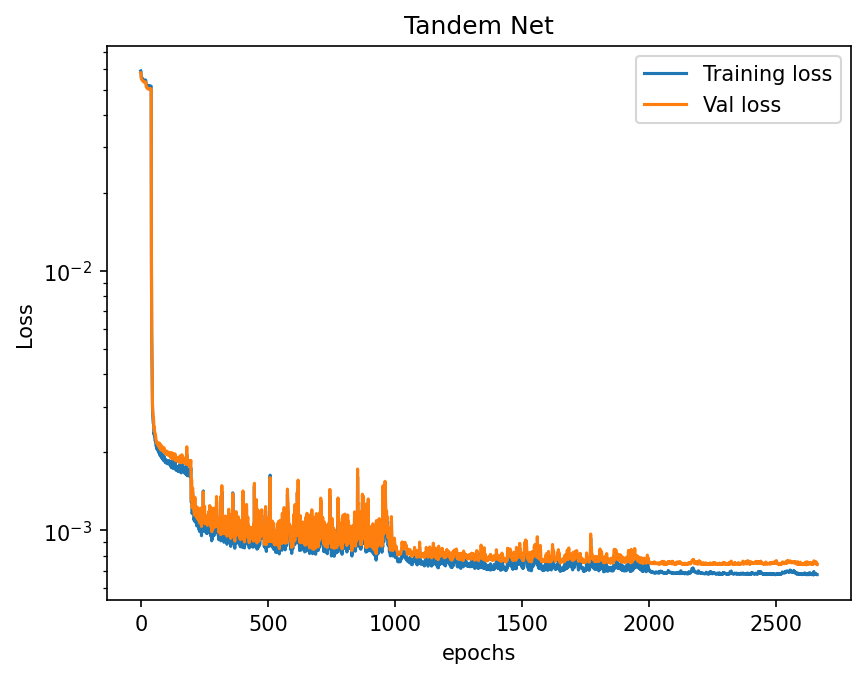

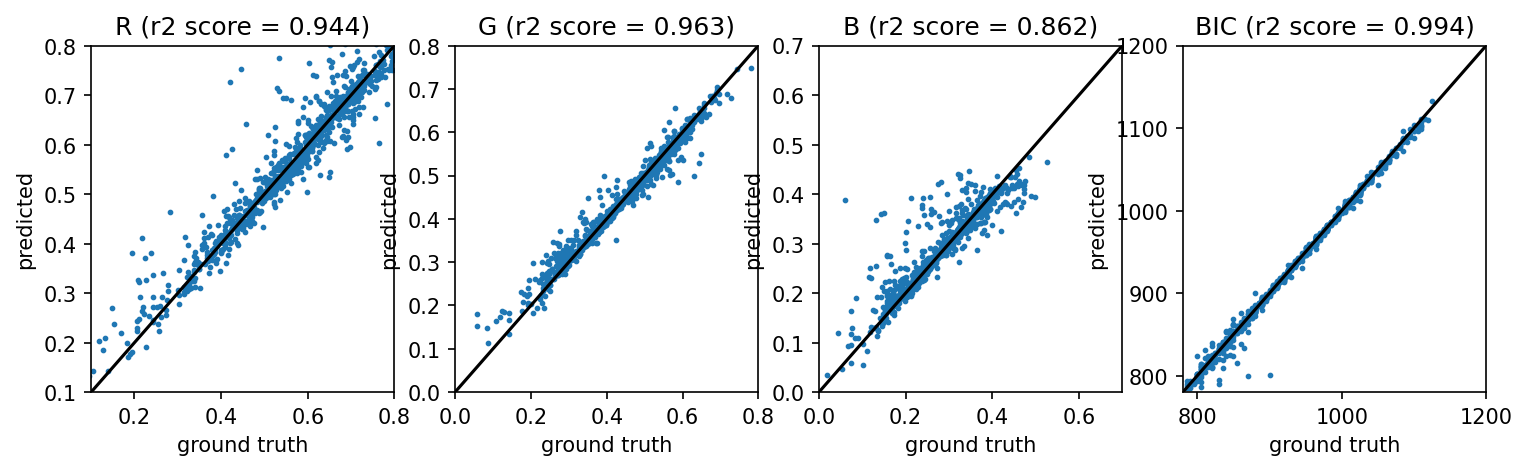

[ 0.04092454  0.01242961  0.01591389  2.71377148]


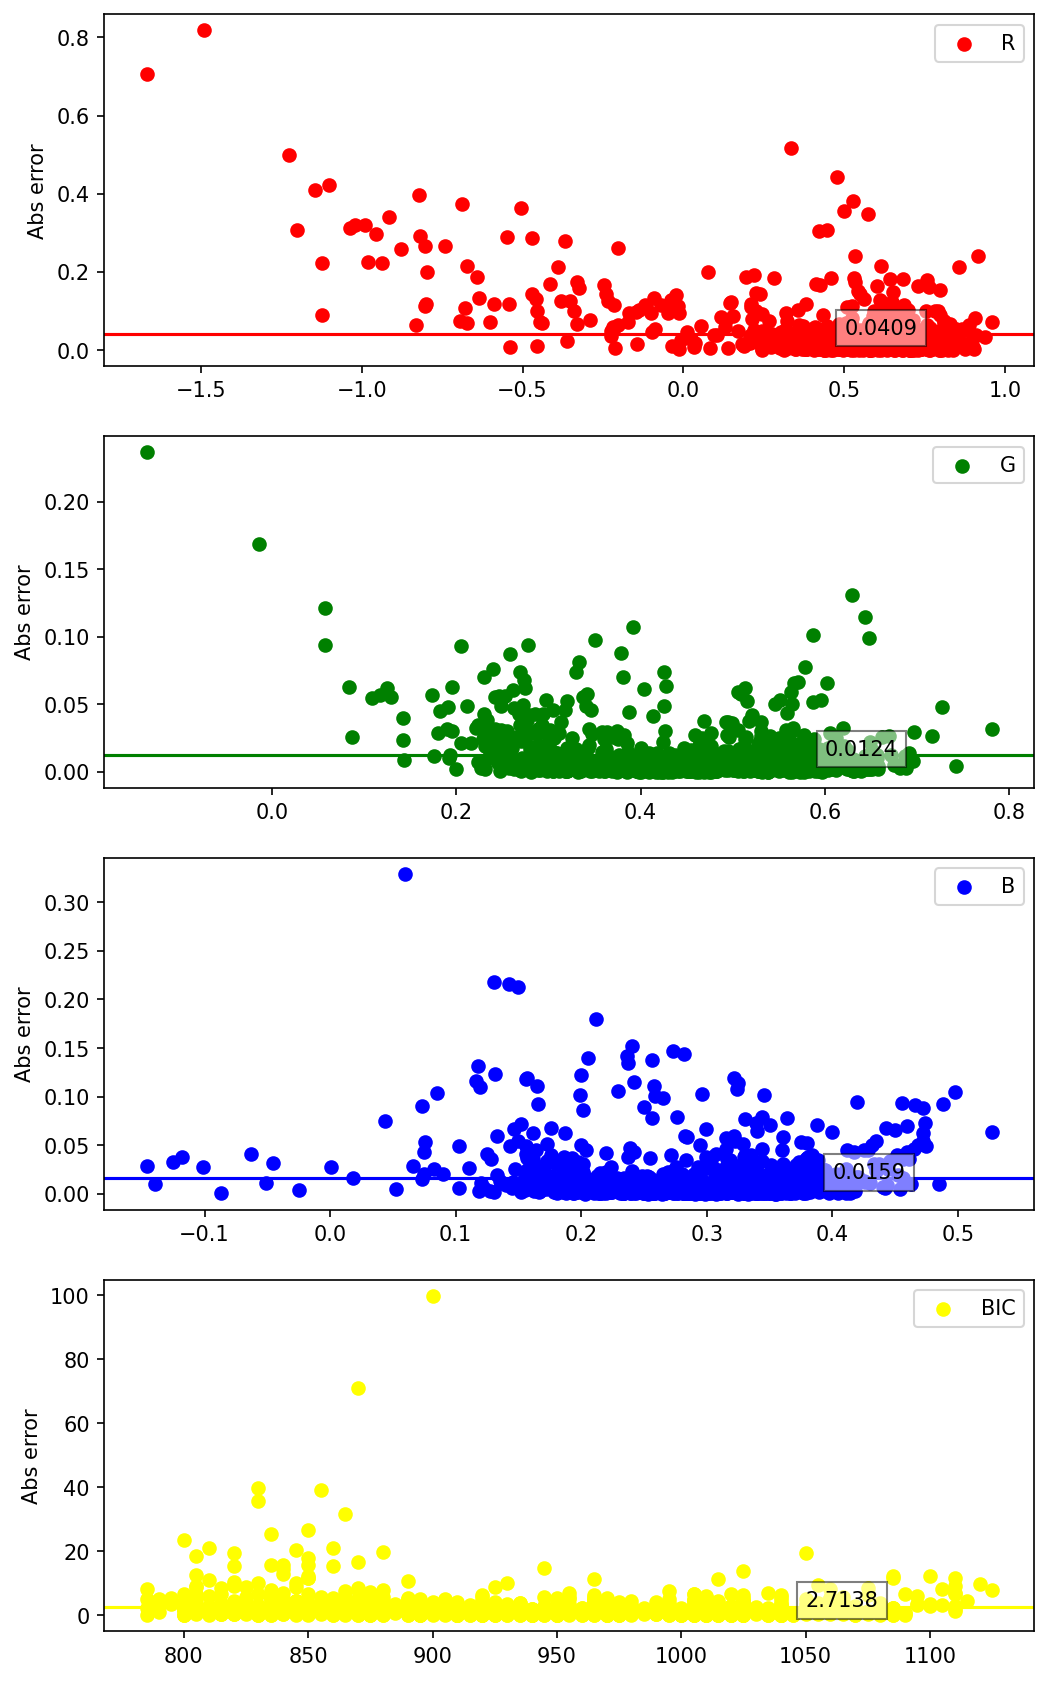

In [49]:
# Train the vae based on forward model, where vae model is GSNN model :

train_loader, val_loader, test_loader = get_dataloaders('forward_model')




color_model = MLP_color(6, 3).to(DEVICE)
color_model.load_state_dict(torch.load(
    './model/forward_03.pth')[
                                  'model_state_dict'])
BIC_model = MLP_BIC(6, 1).to(DEVICE)
BIC_model.load_state_dict(torch.load(
    './model/forwardBIC_02.pth')[
                                  'model_state_dict'])

inverse_model = TandemNet_inverse(4, 6).to(DEVICE)
model = TandemNet(color_model,BIC_model, inverse_model)

model_path = r'model\tandem_01.pth'
#vae_path = './models/summary/cvae_3_forward_True_latent_3_lr_0.001_STEP_True_epochs_10000_weight_forward_10.0_batch_size_128_trained_2_.pth'
model.load_state_dict(torch.load(model_path)['model_state_dict'])
epochs = torch.load(model_path)['epoch']
gan_loss_all = torch.load(model_path)['loss_all']

plt.figure(dpi=150)
plt.plot(range(epochs),gan_loss_all[0,:epochs],label='Training loss')
plt.plot(range(epochs),gan_loss_all[1,:epochs],label='Val loss')

plt.xlabel('epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Tandem Net')
plt.legend()

# evaluate on the training FNNs
color_BIC_raw, param_raw, color_BIC_pred, param_pred = evaluate_tandem(model, color_model,BIC_model, test_loader.dataset, show=0)
R2_plot(color_BIC_raw, color_BIC_pred)
abs_err_plt(color_BIC_raw, color_BIC_pred)

_tandem_color_raw = color_BIC_raw[:]
_tandem_color_pred = color_BIC_pred[:]


# check cVAE

cuda:0 cuda:0 cuda:0 cuda:0 <class 'torch.Tensor'>


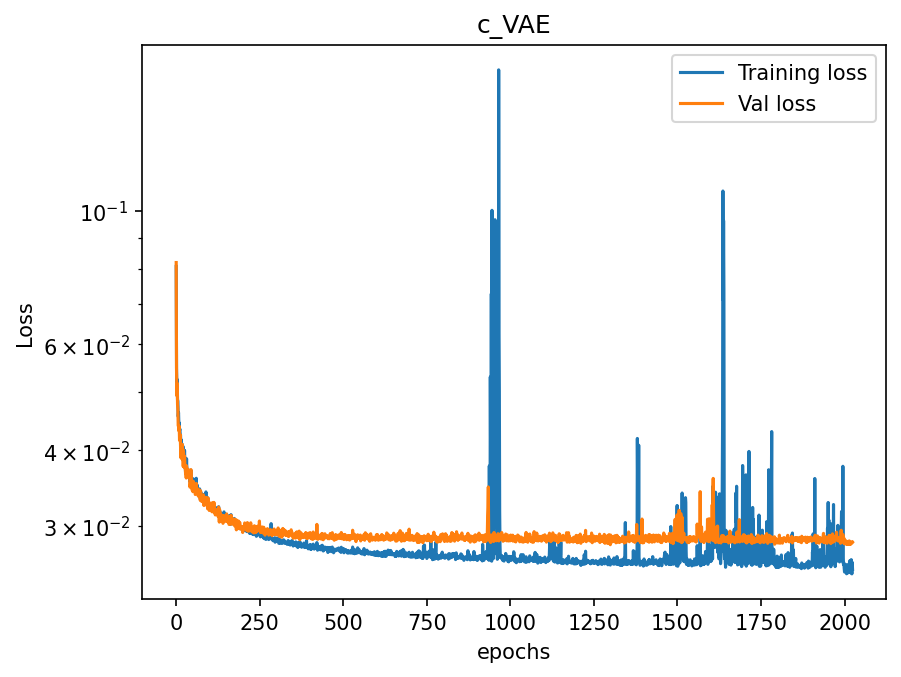

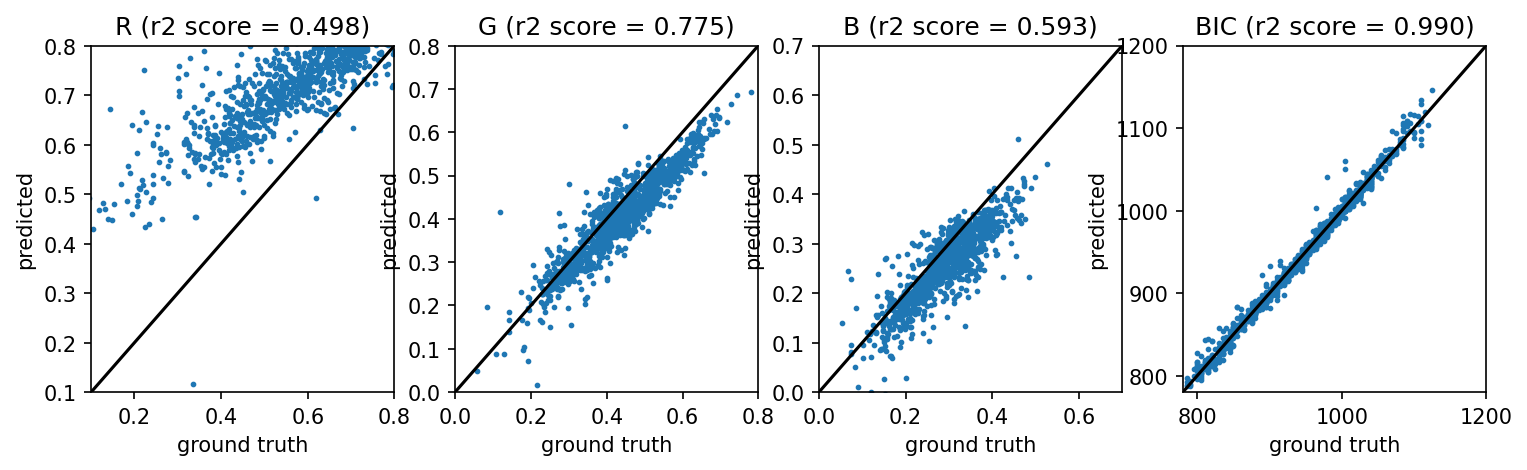

[ 0.1917381   0.04479628  0.04252173  5.29762228]


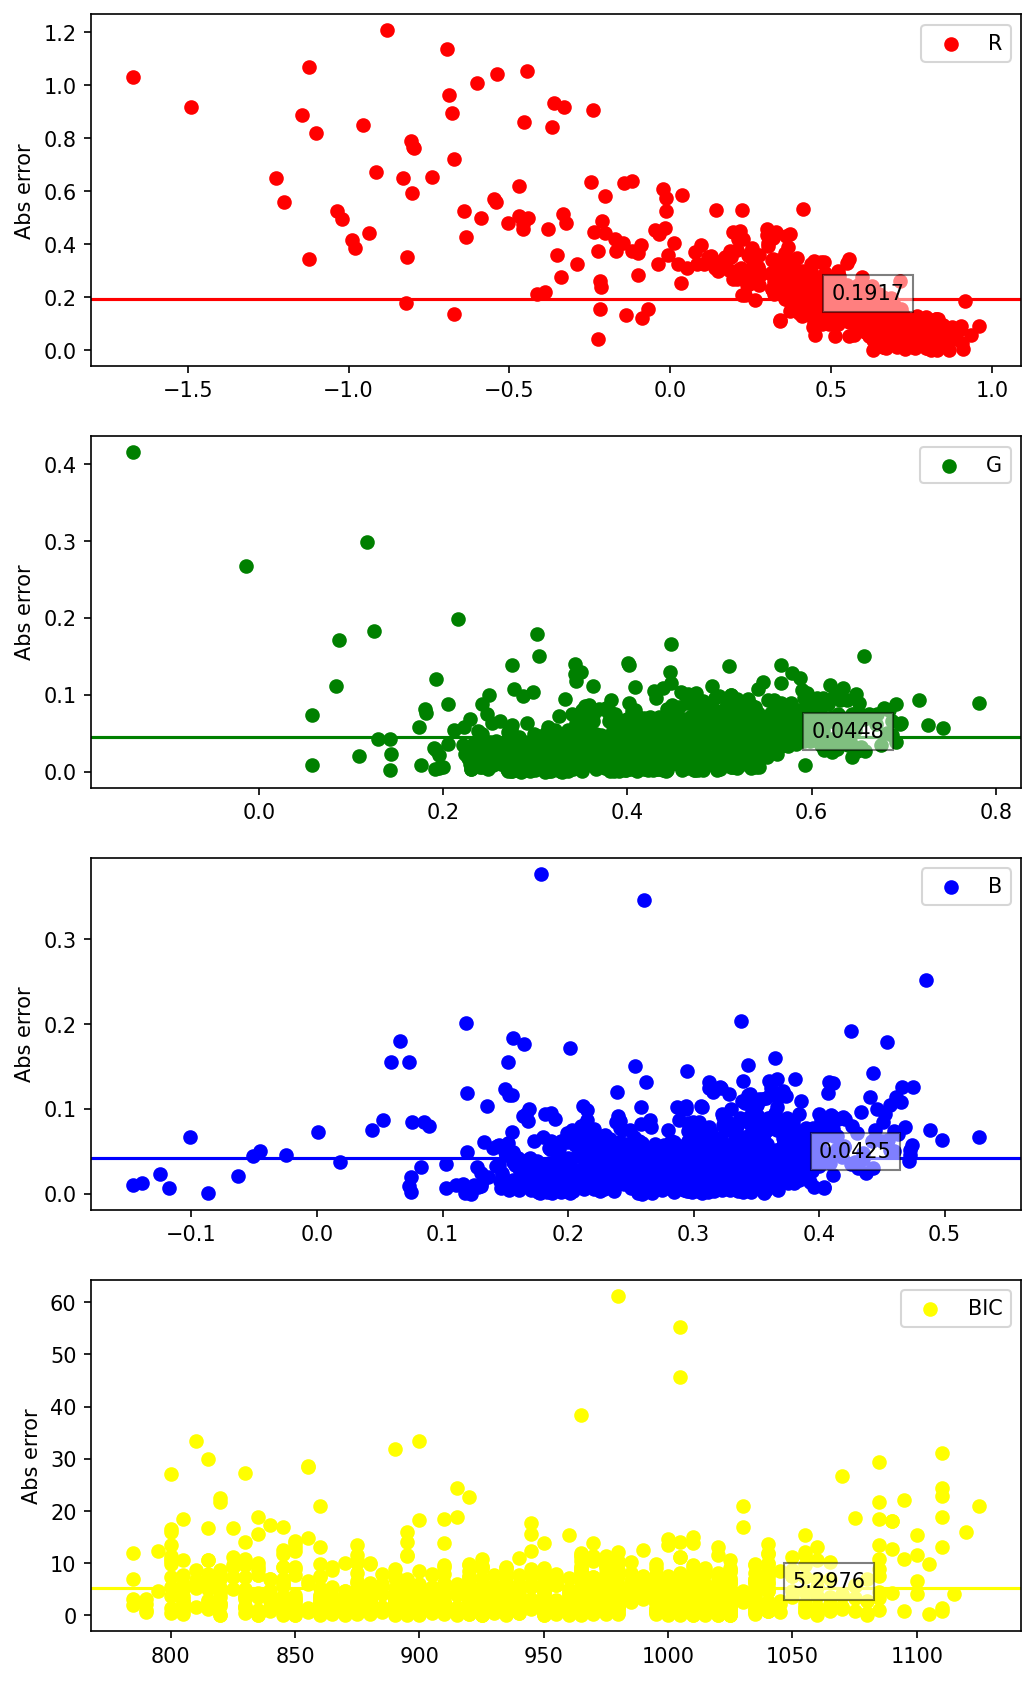

In [50]:
# Train the vae based on forward model, where vae model is GSNN model :

train_loader, val_loader, test_loader = get_dataloaders('forward_model')

color_model = MLP_color(6, 3).to(DEVICE)
color_model.load_state_dict(torch.load(
    './model/forward_03.pth')[
                                  'model_state_dict'])
BIC_model = MLP_BIC(6, 1).to(DEVICE)
BIC_model.load_state_dict(torch.load(
    './model/forwardBIC_02.pth')[
                                  'model_state_dict'])
model = cVAE(6, 4).to(DEVICE)

vae_path = 'model\VAE_pure_01.pth'
#vae_path = './models/summary/cvae_3_forward_True_latent_3_lr_0.001_STEP_True_epochs_10000_weight_forward_10.0_batch_size_128_trained_2_.pth'
model.load_state_dict(torch.load(vae_path)['model_state_dict'])


epochs = torch.load(vae_path)['epoch']
gan_loss_all = torch.load(vae_path)['loss_all']
plt.figure(dpi=150)
plt.plot(range(epochs),gan_loss_all[0,:epochs],label='Training loss')
plt.plot(range(epochs),gan_loss_all[1,:epochs],label='Val loss')

plt.xlabel('epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('c_VAE')
plt.legend()

def evaluate_vae_Full_minmax_inverse(model,color_model,BIC_model,dataset, show=1):
    # evaluate both the vae_GSNN and vae_hybrid model using a forward model
    # x: structure. y: CIE
    '''
    returns:
        y_raw: original desired xyY
        y_raw_pred: xyY predicted by the forward module for the inversely designed structure
        x_raw: original structure parameters
        x_raw_pred: inversely designed parameters.
    '''
    model.eval()
    color_model.eval()
    BIC_model.eval()
    with torch.no_grad():
        range_, min_ = torch.tensor(dataset.scaler.data_range_).to(DEVICE), torch.tensor(dataset.scaler.data_min_).to(
            DEVICE)
        x, y = dataset.x.to(DEVICE), dataset.y.to(DEVICE)
        x_dim = x.size()[1]

        # inferenc using vae_GSNN model and predict using forward model
        x_pred, mu, logvar, temp = model.inference(y)
        y_color_pred = color_model(x_pred, None)
        y_BIC_pred = BIC_model(x_pred, None)
        y_pred = torch.cat((y_color_pred, y_BIC_pred), dim=1)

        x_pred_raw = x_pred * range_[:x_dim] + min_[:x_dim]
        x_raw = x * range_[:x_dim] + min_[:x_dim]

        y_pred_raw = y_pred * range_[x_dim:] + min_[x_dim:]
        y_raw = y * range_[x_dim:] + min_[x_dim:]

        # get MSE for the design
        rmse_design = torch.sqrt((x_pred - x).pow(2).sum(dim=1).mean())
        rmse_design_raw = torch.sqrt((x_pred_raw - x_raw).pow(2).sum(dim=1).mean())
        rmse_cie = torch.sqrt((y_pred - y).pow(2).sum(dim=1).mean())
        rmse_cie_raw = torch.sqrt((y_pred_raw - y_raw).pow(2).sum(dim=1).mean())

        if show == 1:
            print("VAE net Design RMSE loss {:.3f}".format(rmse_design.item()))
            print('VAE Design RMSE raw loss {:.3f}'.format(rmse_design_raw.item()))
            print('Reconstruct net RMSE loss {:.3f}'.format(rmse_cie))
            print('Reconstruct RMSE loss raw {:.3f}'.format(rmse_cie_raw))

    return y_raw.cpu().numpy(), x_raw.cpu().numpy(), y_pred_raw.cpu().numpy(), x_pred_raw.cpu().numpy()

# evaluate on the training FNNs
color_BIC_raw, param_raw, color_BIC_pred, param_pred = evaluate_vae(model,color_model,BIC_model ,test_loader.dataset, show=0)
R2_plot(color_BIC_raw, color_BIC_pred)
abs_err_plt(color_BIC_raw, color_BIC_pred)

_vae_color_raw = color_BIC_raw[:]
_vae_color_pred = color_BIC_pred[:]


# check cGAN

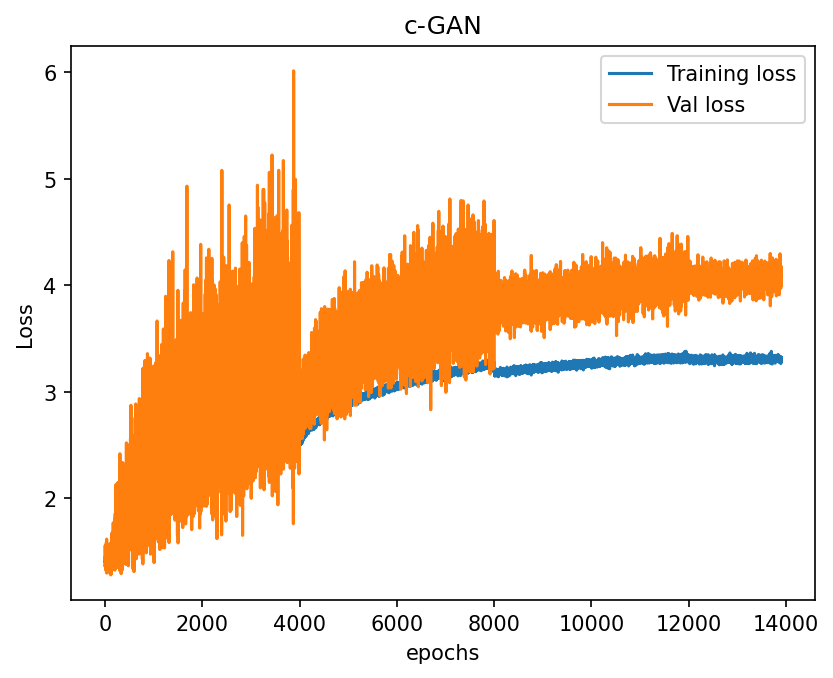

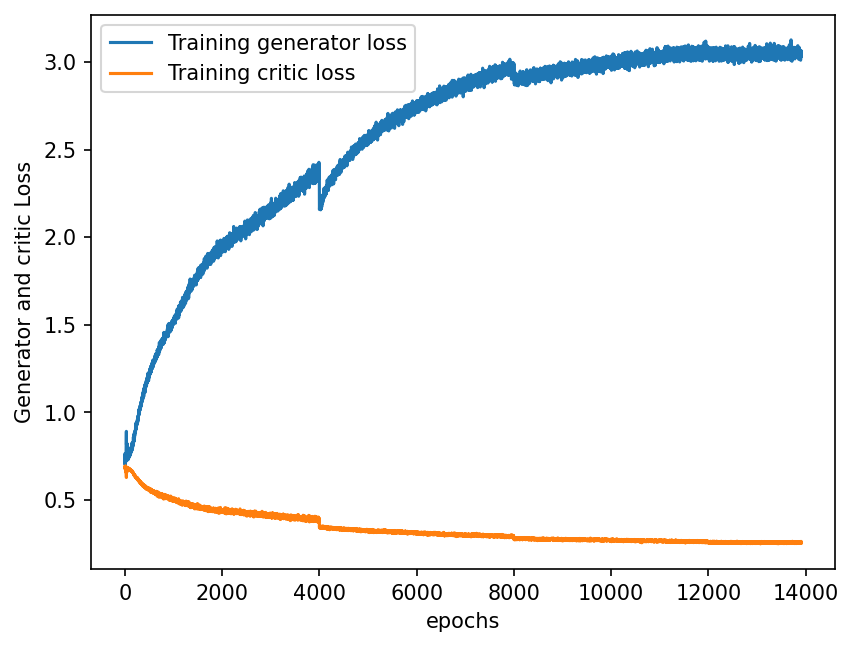

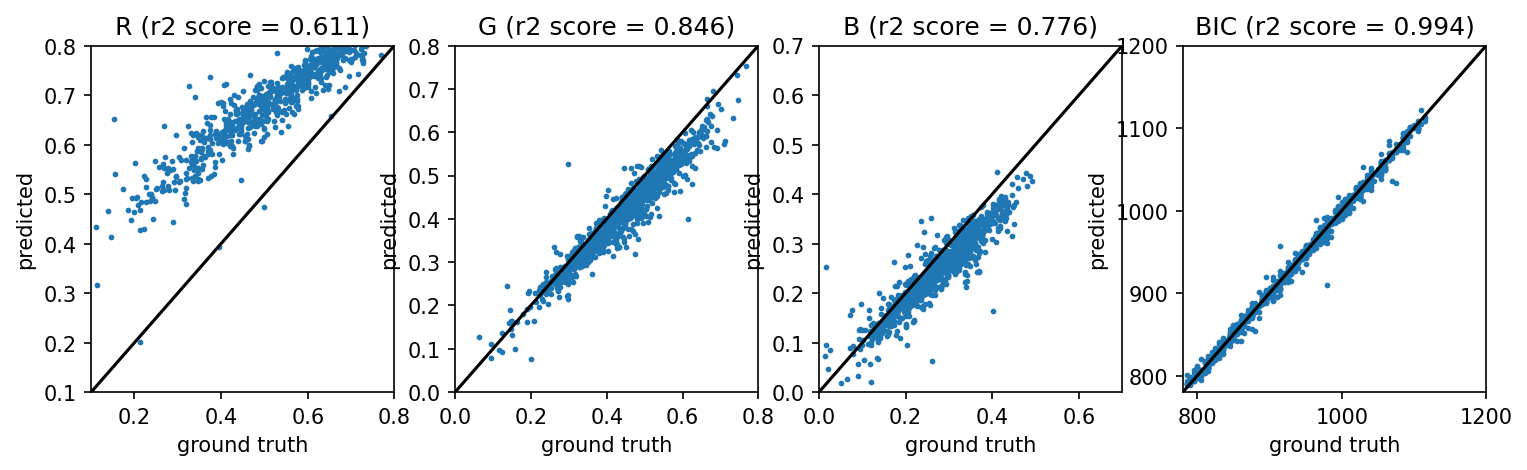

[ 0.18754764  0.03611541  0.03653146  4.18316988]


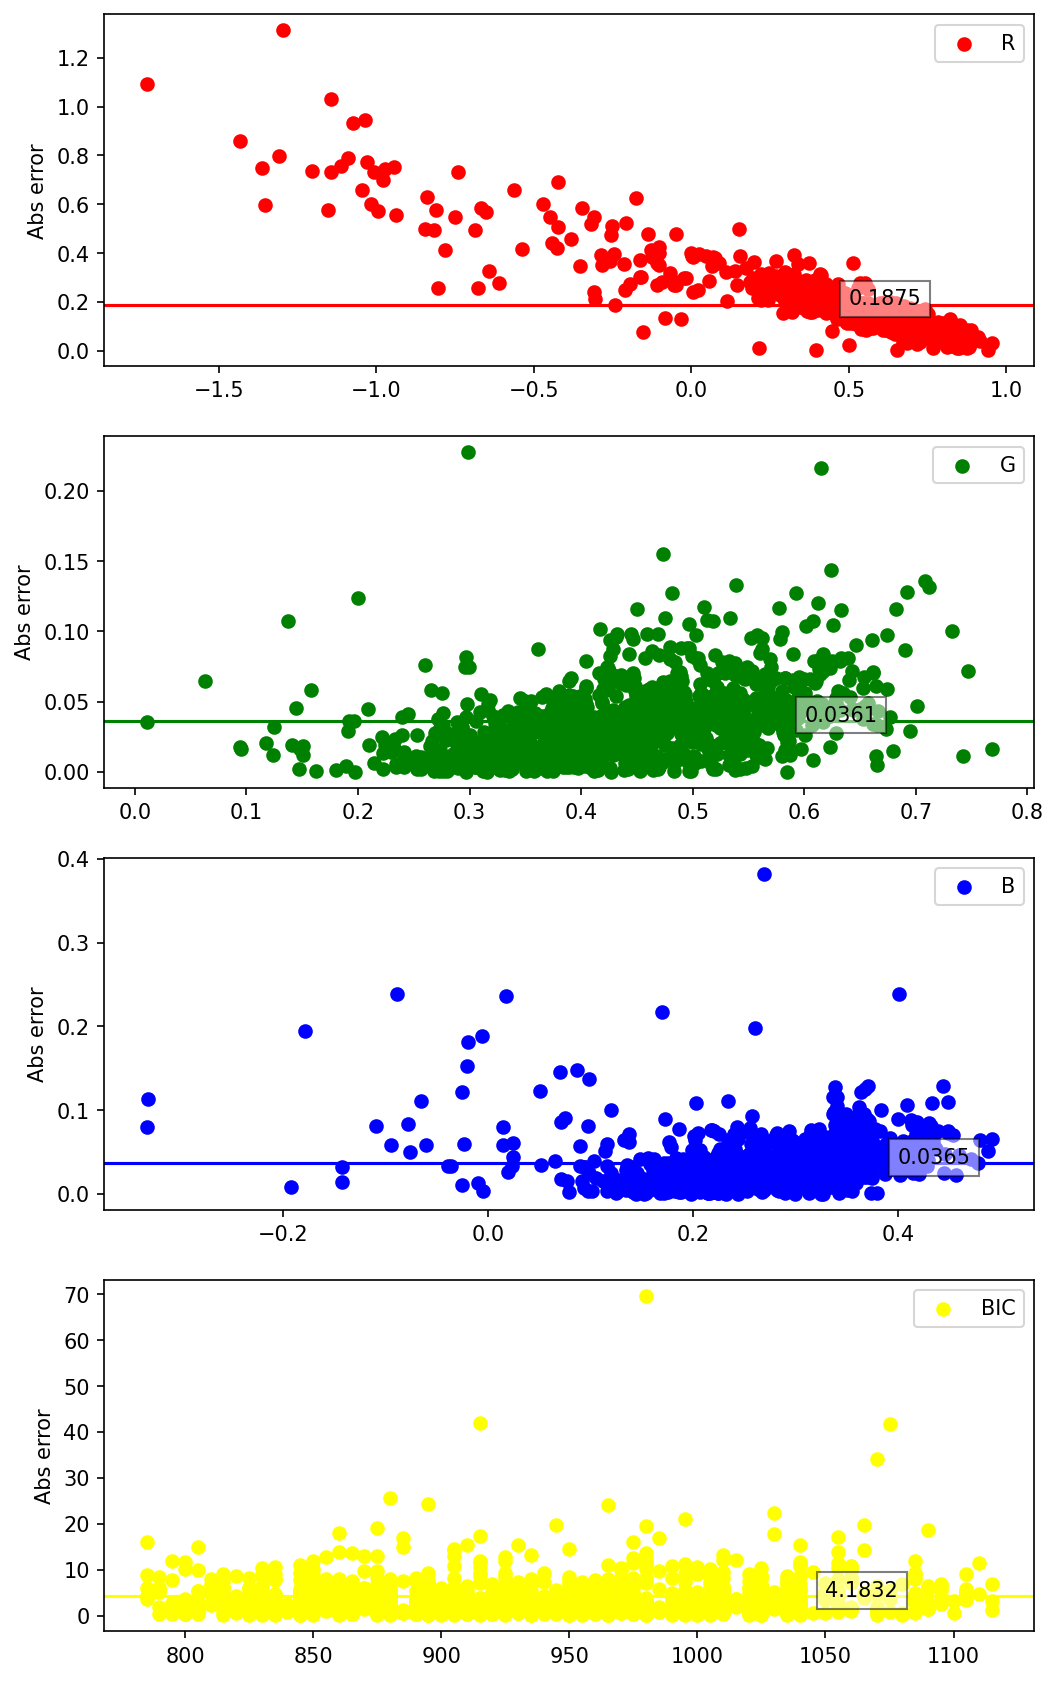

In [51]:
# Evaluate the performance of GAN
train_loader, val_loader, test_loader = get_dataloaders('gan')

forward_color_model = MLP_color(6, 3).to(DEVICE)
forward_color_model.load_state_dict(torch.load(
        './model/forward_03.pth')[
                                    'model_state_dict'])
forward_BIC_model = MLP_BIC(6, 1).to(DEVICE)
forward_BIC_model.load_state_dict(torch.load(
        './model/forwardBIC_02.pth')[
                                    'model_state_dict'])

gan_model = cGAN(4, 6, 2).to(DEVICE)
gan_path = 'model\cGAN_01.pth'

epochs = torch.load(gan_path)['epoch']
gan_loss_all = torch.load(gan_path)['loss_all']
plt.figure(dpi=150)
plt.plot(range(epochs),gan_loss_all[0,:epochs],label='Training loss')  
plt.plot(range(epochs),gan_loss_all[1,:epochs],label='Val loss')                     
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('c-GAN')
plt.legend()

plt.figure(dpi=150)
plt.plot(range(epochs),gan_loss_all[3,:epochs],label='Training generator loss')  
plt.plot(range(epochs),gan_loss_all[4,:epochs],label='Training critic loss')                     
plt.xlabel('epochs')
plt.ylabel('Generator and critic Loss')
plt.legend()


gan_model.load_state_dict(torch.load(gan_path)['model_state_dict'])
color_BIC_raw, param_raw, color_BIC_pred, param_pred= evaluate_gan(gan_model, forward_color_model,forward_BIC_model, val_loader.dataset, show=0)
R2_plot(color_BIC_raw, color_BIC_pred)
abs_err_plt(color_BIC_raw, color_BIC_pred)

_gan_color_raw = color_BIC_raw[:]
_gan_color_pred = color_BIC_pred[:]

# 模型对比——个例

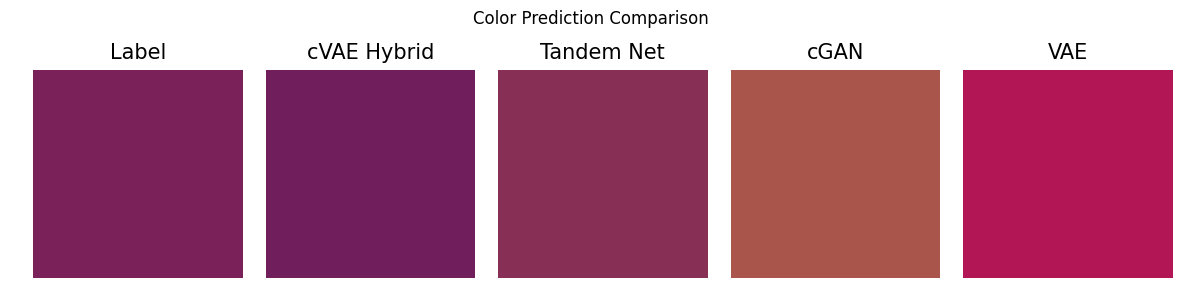

In [80]:
import matplotlib.pyplot as plt
choice = 103
# 假设这是您的颜色数据字典
predictions = {
    'Label': _cVAE_hybrid_color_raw[choice][:3],
    'cVAE Hybrid': _cVAE_hybrid_color_pred[choice][:3],
    'Tandem Net': _tandem_color_pred[choice][:3],
    'cGAN': _gan_color_pred[choice][:3],
    'VAE': _vae_color_pred[choice][:3],
}

# 设置色块之间的间隙宽度
gap = 0.3
# 计算每个色块的总宽度（包括间隙）
block_size = 3 - gap  # 因为是正方形，所以宽度等于高度

# 创建一个图形和轴
fig, ax = plt.subplots()

# 设置图形大小，这里假设我们想要每个色块加上间隙后总共占据2个单位长度
num_blocks = len(predictions)
fig.set_size_inches(num_blocks * (block_size + gap), block_size + 0.5)  # 为标签留出空间

# 遍历颜色列表，为每种颜色创建一个矩形（色块）并添加标签
for idx, (label, color) in enumerate(predictions.items()):
    # 创建一个正方形色块，位置在(idx * (block_size + gap), 0)，宽度和高度都为block_size
    rect = plt.Rectangle((idx * (block_size + gap), 0), block_size, block_size, fc=color)
    ax.add_patch(rect)
    # 在每个色块上方添加标签
    ax.text(idx * (block_size + gap) + block_size / 2, block_size + 0.1, label,
            ha='center', va='bottom', fontsize=15)

# 设置x轴范围，使其恰好容纳所有带间隙的色块
ax.set_xlim(-gap, num_blocks * (block_size + gap) - gap)
# 设置y轴范围，使色块占据整个高度，并为标签留出空间
ax.set_ylim(0, block_size + 0.5)
# 关闭坐标轴显示
ax.axis('off')
plt.title('Color Prediction Comparison')
# 显示图形
plt.show()

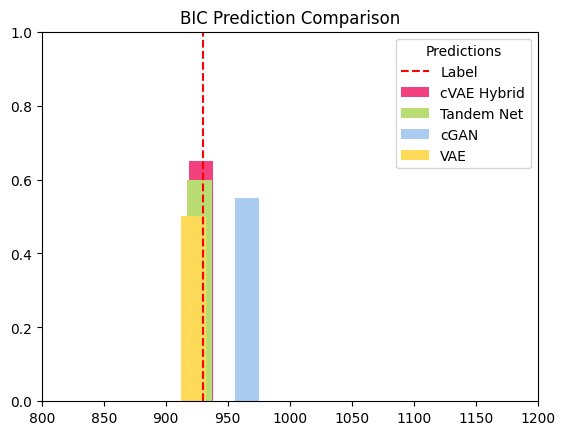

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的数据（请替换为实际的数据）
choice = 50  # 示例选择索引

predictions = {
    # 'Label': _cVAE_hybrid_color_raw[choice][3],
    'cVAE Hybrid': _cVAE_hybrid_color_pred[choice][3],
    'Tandem Net': _tandem_color_pred[choice][3],
    'cGAN': _gan_color_pred[choice][3],
    'VAE': _vae_color_pred[choice][3],
}

custom_colors = {
    'cVAE Hybrid': '#f34180',  
    'Tandem Net': '#b9dd73',  
    'cGAN': '#aaccf0',  
    'VAE': '#ffda58'   
}

custom_height = {
    'cVAE Hybrid': 0.65,  
    'Tandem Net': 0.6,  
    'cGAN': 0.55,  
    'VAE': 0.5  
}

label_value = _cVAE_hybrid_color_raw[choice][3]

# 创建x轴范围
x = np.arange(800, 1201)

# 设置柱子宽度
bar_width = 20

# 绘制每个预测值的柱子
for label, value in predictions.items():
    plt.bar(value, custom_height[label], width=bar_width, align='center', label=label,color=custom_colors[label])
    # plt.axvline(x=value, color=custom_colors[label], linestyle='--')


# 添加一个代表Label值的垂直虚线
plt.axvline(x=label_value, color='r', linestyle='--', label='Label')

# 设置x轴标签和范围
plt.xlim(800, 1200)
plt.ylim(0, 1)
plt.xticks(np.arange(800, 1201, 50))  # 每隔50个单位设置一个刻度

# 添加图例
plt.legend(title='Predictions')

# 添加标题
plt.title('BIC Prediction Comparison')

# 显示图像
plt.show()

In [18]:
# 模型对比——整体

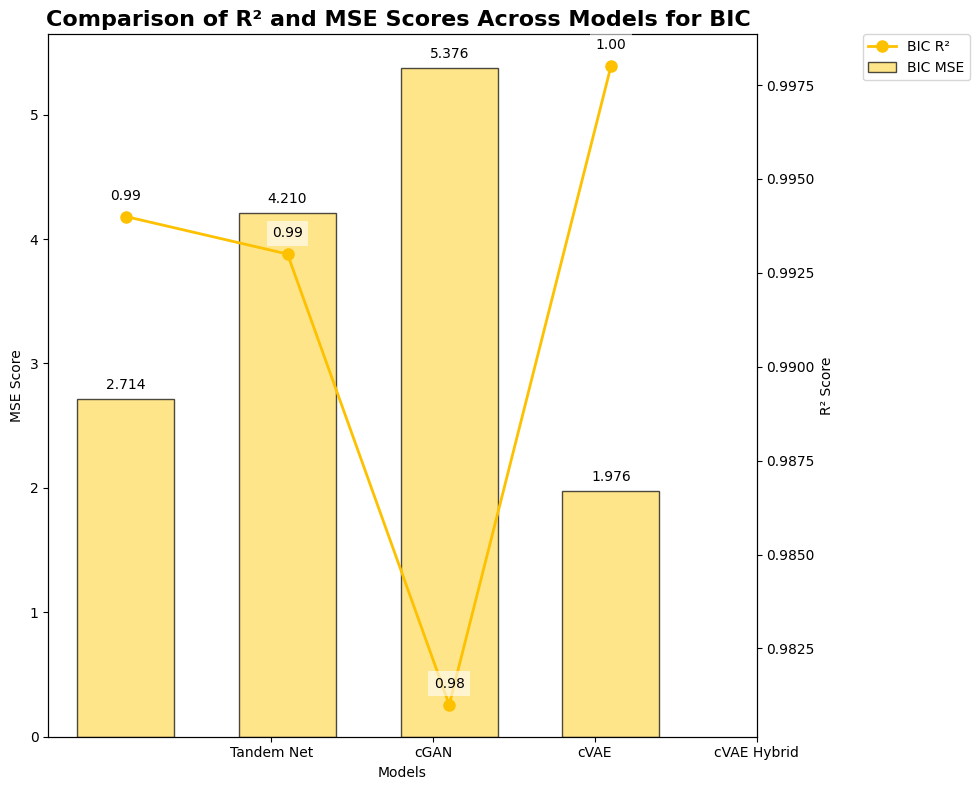

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的数据 - 每个模型在CMYK上的R²和MSE得分
models = ['Tandem Net', 'cGAN', 'cVAE', 'cVAE Hybrid']

# 创建数据字典
data = {
    # 'R': {'r2': [0.944, 0.592, 0.488, 0.992], 'mse': [0.0409, 0.1881, 0.1916, 0.0177]},
    # 'G': {'r2': [0.963, 0.854, 0.768, 0.990], 'mse': [0.0124, 0.0352, 0.0448, 0.0067]},
    # 'B': {'r2': [0.862, 0.805, 0.585, 0.980], 'mse': [0.0159, 0.0349, 0.0416, 0.0069]},
    'BIC': {'r2': [0.994, 0.993, 0.981, 0.998], 'mse': [2.7138, 4.2095, 5.3761, 1.9757]}
}

# 设置图形大小
fig, ax1 = plt.subplots(figsize=(10, 8))

# 定义自定义颜色映射（使用十六进制颜色代码）
custom_colors = {
    'R': '#f86d70',  
    'G': '#b9dd73',  
    'B': '#aaccf0',  
    'BIC': '#ffda58'   
}

R2_colors = {
    'R': '#e84540',  
    'G': '#8cba00',  
    'B': '#3e96d4',  
    'BIC': '#fdc100'   
}

# 绘制MSE柱状图
bar_width = 0.6
index = np.arange(len(models))
for idx, color in enumerate(['BIC']):
    bars = ax1.bar(index + idx * bar_width, data[color]['mse'], bar_width, label=f'{color} MSE', color=custom_colors[color], alpha=0.7, edgecolor='black')
    
    # 添加数值标签到柱状图
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(data[color]['mse']) * 0.01,
                 f'{height:.3f}', ha='center', va='bottom', color='black',
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# 创建第二个Y轴用于R²
ax2 = ax1.twinx()

# 绘制R²折线图
markers = ['o', 's', '^', 'D']  # 不同的标记样式
for idx, color in enumerate(['BIC']):
    line, = ax2.plot(index + idx * bar_width, data[color]['r2'], marker=markers[idx], linestyle='-', color=R2_colors[color], linewidth=2, markersize=8, label=f'{color} R²')
    
    # 添加数值标签到折线图
    for i, txt in enumerate(data[color]['r2']):
        ax2.annotate(f'{txt:.2f}', xy=(index[i] + idx * bar_width, txt), xytext=(0, 10), textcoords="offset points",
                     ha='center', va='bottom', color='black',
                     bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# 设置坐标轴标签
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE Score')
ax2.set_ylabel('R² Score')

# 设置X轴刻度
ax1.set_xticks(index + bar_width * 1.5)
ax1.set_xticklabels(models)

# 添加图例

lines, labels = ax2.get_legend_handles_labels()
bars, bar_labels = ax1.get_legend_handles_labels()
ax2.legend(lines + bars, labels + bar_labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0.)

# 设置标题
plt.title('Comparison of R² and MSE Scores Across Models for BIC ', fontsize=16, fontweight='bold')

# 显示图表
plt.tight_layout()
plt.show()

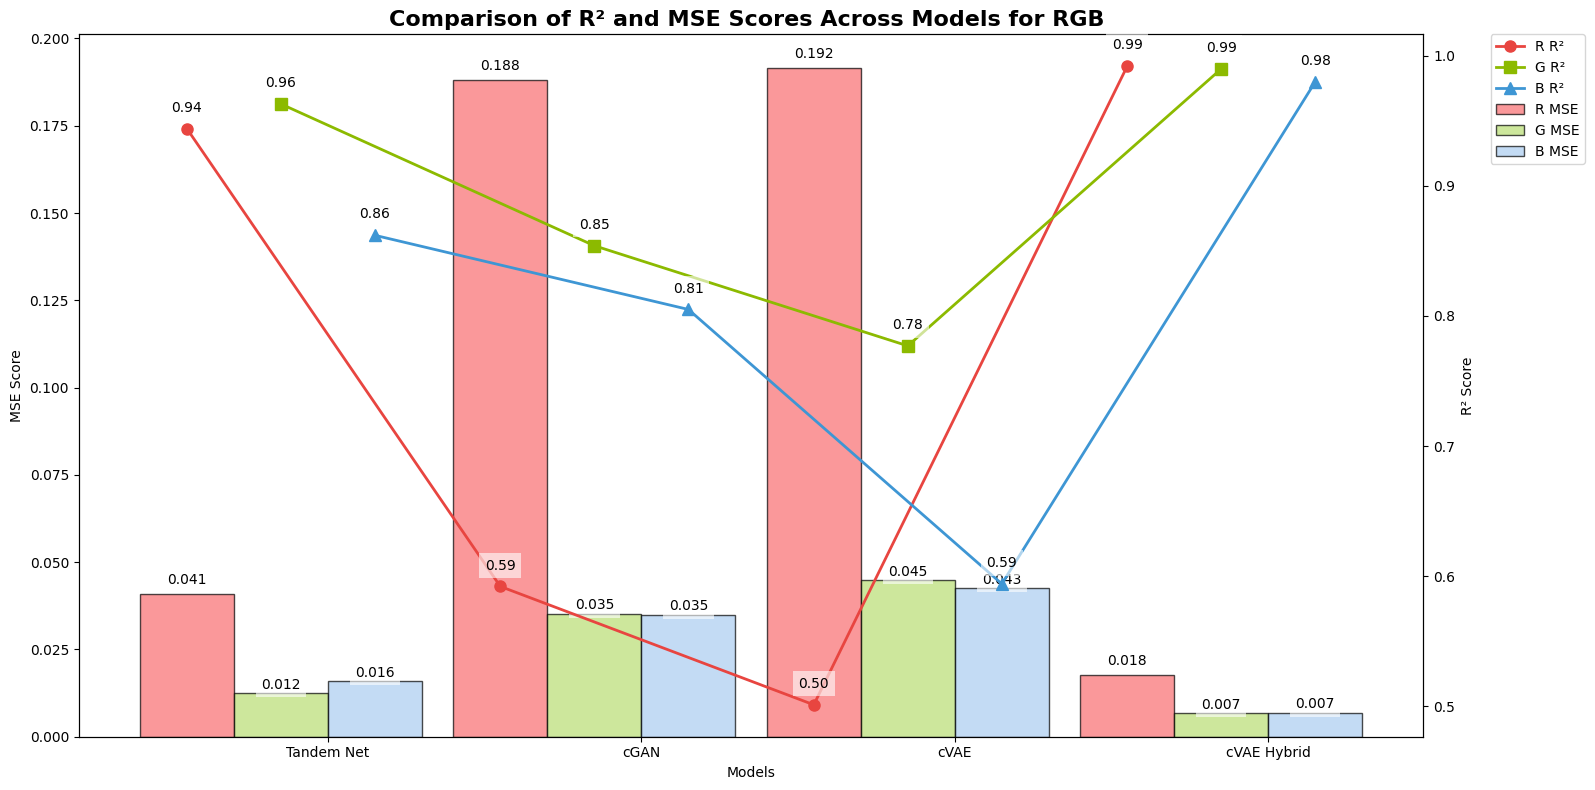

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的数据 - 每个模型在CMYK上的R²和MSE得分
models = ['Tandem Net', 'cGAN', 'cVAE', 'cVAE Hybrid']

# 创建数据字典
data = {
    'R': {'r2': [0.944, 0.592, 0.501, 0.992], 'mse': [0.0409, 0.1881, 0.1916, 0.0177]},
    'G': {'r2': [0.963, 0.854, 0.777, 0.990], 'mse': [0.0124, 0.0352, 0.0448, 0.0067]},
    'B': {'r2': [0.862, 0.805, 0.594, 0.980], 'mse': [0.0159, 0.0349, 0.0426, 0.0069]},
    # 'BIC': {'r2': [0.994, 0.993, 0.981, 0.998], 'mse': [2.7138, 4.2095, 5.3226, 1.9757]}
}

# 设置图形大小
fig, ax1 = plt.subplots(figsize=(16, 8))

# 定义自定义颜色映射（使用十六进制颜色代码）
custom_colors = {
    'R': '#f86d70',  
    'G': '#b9dd73',  
    'B': '#aaccf0',  
    'BIC': '#ffda58'   
}

R2_colors = {
    'R': '#e84540',  
    'G': '#8cba00',  
    'B': '#3e96d4',  
    'BIC': '#fdc100'   
}

# 绘制MSE柱状图
bar_width = 0.3
index = np.arange(len(models))
for idx, color in enumerate(['R', 'G', 'B']):
    bars = ax1.bar(index + idx * bar_width, data[color]['mse'], bar_width, label=f'{color} MSE', color=custom_colors[color], alpha=0.7, edgecolor='black')
    
    # 添加数值标签到柱状图
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(data[color]['mse']) * 0.01,
                 f'{height:.3f}', ha='center', va='bottom', color='black',
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# 创建第二个Y轴用于R²
ax2 = ax1.twinx()

# 绘制R²折线图
markers = ['o', 's', '^', 'D']  # 不同的标记样式
for idx, color in enumerate(['R', 'G', 'B']):
    line, = ax2.plot(index + idx * bar_width, data[color]['r2'], marker=markers[idx], linestyle='-', color=R2_colors[color], linewidth=2, markersize=8, label=f'{color} R²')
    
    # 添加数值标签到折线图
    for i, txt in enumerate(data[color]['r2']):
        ax2.annotate(f'{txt:.2f}', xy=(index[i] + idx * bar_width, txt), xytext=(0, 10), textcoords="offset points",
                     ha='center', va='bottom', color='black',
                     bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# 设置坐标轴标签
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE Score')
ax2.set_ylabel('R² Score')

# 设置X轴刻度
ax1.set_xticks(index + bar_width * 1.5)
ax1.set_xticklabels(models)

# 添加图例

lines, labels = ax2.get_legend_handles_labels()
bars, bar_labels = ax1.get_legend_handles_labels()
ax2.legend(lines + bars, labels + bar_labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# 设置标题
plt.title('Comparison of R² and MSE Scores Across Models for RGB ', fontsize=16, fontweight='bold')

# 显示图表
plt.tight_layout()
plt.show()